# Task 3

In [227]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms
import random
from sklearn import preprocessing


# Obtaining and normalizing MNIST dataset helped by: https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627
# Mean and Standart Deviation 0.5 each for data normalization [-1, 1] 
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),

                               ])
# No normalization
transform2 = transforms.ToTensor()


trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=100, shuffle=True)


class Mnet(nn.Module):
    def __innit__(self):
        super(Mnet, self).__init__()
        self.layer1 = nn.Linear(28*28, 120)
        self.layer2 = nn.Linear(120, 50)
        self.final_layer = nn.Linear(50, 10)
        self.softmax = nn.Softmax(dim=1)
        
        
    def forward(self, images):
        # flatten out the images
        x = images.view(-1, 28*28)
        x = F.relu(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        x = self.softmax(self.final_layer(x))
        return x

In [228]:
## TRAINING
# Mean Squared Error loss function
# Stochastic Gradient Descent optimizer

model = Mnet()
model.__innit__()
# Summing the (output-labels)^2 (reduction=sum) because otherwise the losses are very low and not decreasing. Maybe of problems with one hot encoded, couldn't figure it out
# Adds a bit of time for computing
mse_loss = nn.MSELoss(reduction='sum')
params = model.parameters()
optimizer = optim.SGD(params=params, lr=0.001)

epochs = 5
losses_train = []
losses_eval = []
epoch_loss = []
for e in range(epochs):
    iterations = 0

    model.train()
    total_loss = 0
    #print("epoch", e)
    for i, (images, labels) in enumerate(trainloader):
        #forward pass
        output = model(images)
        # this zeroes / resets all the gradients in the model, so that it is ready to go for the next back propagation pass
        model.zero_grad()
        labels_one_hot_encoded = torch.nn.functional.one_hot(labels, 10).float()
        loss = mse_loss(output, labels_one_hot_encoded)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()/100 # Divide by batch size because I am using reduction=sum for mseloss
        losses_train.append(loss.item()/100) # # Divide by batch size because I am using reduction=sum for mseloss
        iterations += 1
    epoch_loss.append(total_loss/iterations)    
    model.eval()
    for i, (images, labels) in enumerate(valloader):
        #print("i", i)
        #forward pass
        output = model(images)
        
        model.zero_grad()
        labels_one_hot_encoded = torch.nn.functional.one_hot(labels, 10).float()

        loss = mse_loss(output, labels_one_hot_encoded)
        loss.backward()
        
        optimizer.step()
        
        losses_eval.append(loss.item()/100)
        

        



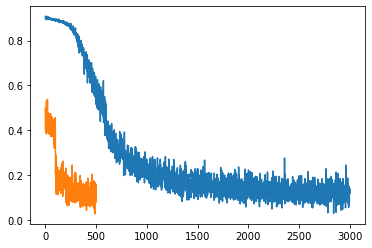

In [229]:
import matplotlib.pyplot as plt

plt.plot(losses_train)
plt.plot(losses_eval)
plt.show()




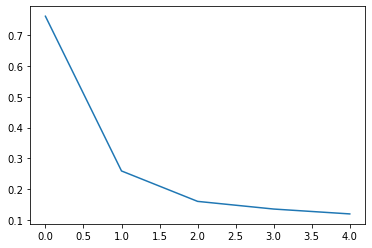

In [230]:
plt.plot(epoch_loss)
plt.show()

In [165]:
print(trainloader)

In [198]:
var = np.array([0.1107, 0.0610, 0.0884, 0.1147, 0.1138, 0.1169, 0.1101, 0.0611, 0.0657,
         0.1575])
var2 = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

print(np.sum(np.square(var-var2)))

0.87914015
